In [6]:
pip install kaggle


Note: you may need to restart the kernel to use updated packages.


In [7]:
pip install tensorflow

Note: you may need to restart the kernel to use updated packages.


In [8]:
import pandas as pd

df = pd.read_csv("/kaggle/input/reddit-depression-dataset/reddit_depression_dataset.csv")

df.fillna('', inplace=True)

df['text'] = df['title'] + " " + df['body']

print(df[['text', 'label']].head())

print("Label distribution:")
print(df['label'].value_counts())


/tmp/ipykernel_31/88728122.py:3: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("/kaggle/input/reddit-depression-dataset/reddit_depression_dataset.csv")
/tmp/ipykernel_31/88728122.py:5: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  df.fillna('', inplace=True)


                                                text label
0  Deep thoughts underdog Only when we start cons...   0.0
1  I like this sub, there's only two posts yet I ...   0.0
2  Rebirth! Hello. \nI am the new guy in charge h...   0.0
3  "I want to be like water. I want to slip throu...   0.0
4  Who am I? You could take any one cell in my bo...   0.0
Label distribution:
label
0.0    1990261
1.0     480411
           106
Name: count, dtype: int64


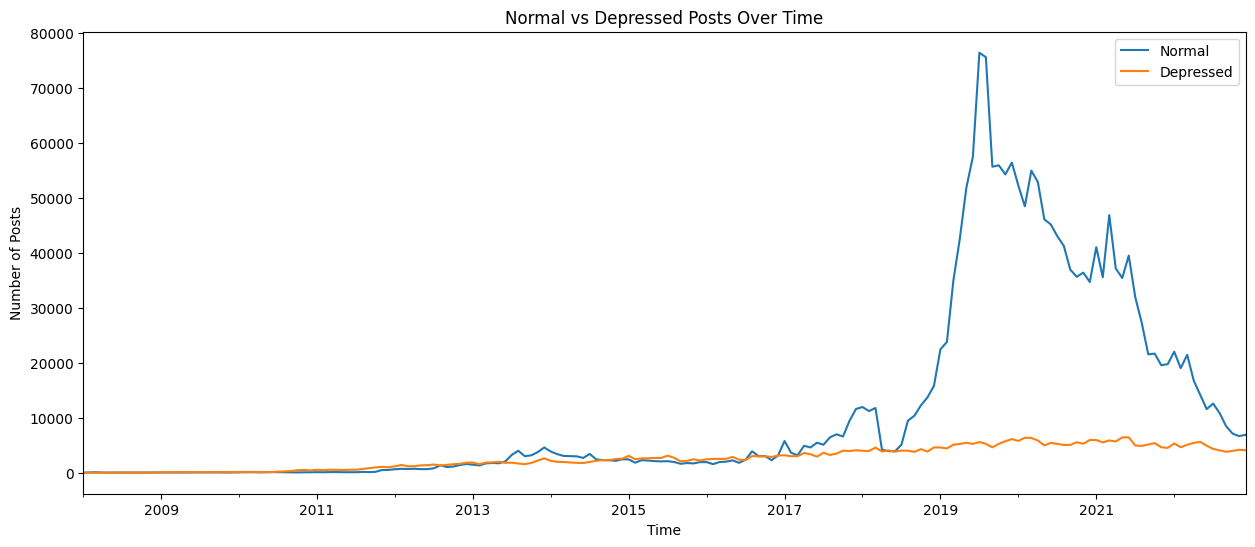

In [9]:
import matplotlib.pyplot as plt

df['created_utc'] = pd.to_datetime(df['created_utc'], unit='s', errors='coerce')
df = df[df['created_utc'].notnull() & df['label'].notnull()]
df['label'] = df['label'].astype(int)
df['year_month'] = df['created_utc'].dt.to_period('M')
timeline = df.groupby(['year_month', 'label']).size().unstack().fillna(0)
timeline.columns = ['Normal', 'Depressed']
timeline.plot(figsize=(15, 6))
plt.title("Normal vs Depressed Posts Over Time")
plt.xlabel("Time")
plt.ylabel("Number of Posts")
plt.show()


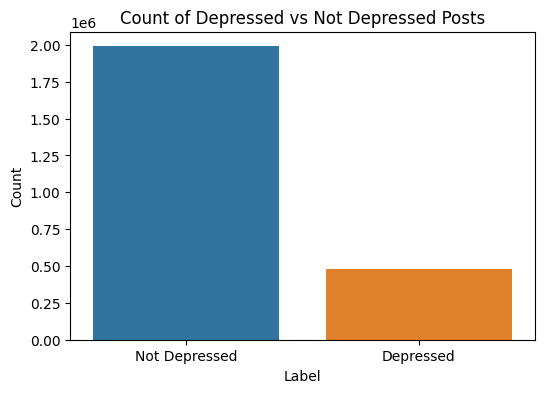

In [10]:
import seaborn as sns
import matplotlib.pyplot as plt

df['label'] = df['label'].astype(int)

plt.figure(figsize=(6, 4))
sns.countplot(x='label', data=df)
plt.xticks([0, 1], ['Not Depressed', 'Depressed'])
plt.title('Count of Depressed vs Not Depressed Posts')
plt.xlabel('Label')
plt.ylabel('Count')
plt.show()


In [11]:
df.head()

,Unnamed: 0,subreddit,title,body,upvotes,created_utc,num_comments,label,text,year_month
0,47951,DeepThoughts,Deep thoughts underdog,"Only when we start considering ourselves, the ...",4.0,2014-07-14 03:35:09,,0,Deep thoughts underdog Only when we start cons...,2014-07
1,47952,DeepThoughts,"I like this sub, there's only two posts yet I ...",Anyway: Human Morality is a joke so long as th...,4.0,2014-09-13 00:31:19,1.0,0,"I like this sub, there's only two posts yet I ...",2014-09
2,47957,DeepThoughts,Rebirth!,Hello. \nI am the new guy in charge here (Besi...,6.0,2014-11-20 04:31:58,1.0,0,Rebirth! Hello. \nI am the new guy in charge h...,2014-11
3,47959,DeepThoughts,"""I want to be like water. I want to slip throu...",,25.0,2014-11-20 19:38:05,2.0,0,"""I want to be like water. I want to slip throu...",2014-11
4,47960,DeepThoughts,Who am I?,You could take any one cell in my body and kil...,5.0,2014-11-20 20:36:52,4.0,0,Who am I? You could take any one cell in my bo...,2014-11


In [12]:
import pandas as pd

df['text'] = (df['title'].fillna('') + ' ' + df['body'].fillna('')).str.strip()
df = df[['label', 'text']]


In [13]:
df.head()

,label,text
0,0,Deep thoughts underdog Only when we start cons...
1,0,"I like this sub, there's only two posts yet I ..."
2,0,Rebirth! Hello. \nI am the new guy in charge h...
3,0,"""I want to be like water. I want to slip throu..."
4,0,Who am I? You could take any one cell in my bo...


In [14]:
df = df.dropna(subset=['label', 'text'])
df['label'] = df['label'].astype(int)


15442/15442 ━━━━━━━━━━━━━━━━━━━━ 389s 25ms/step - accuracy: 0.9068 - loss: 0.2456 - precision: 0.7036 - recall: 0.9015 - val_accuracy: 0.9246 - val_loss: 0.1888 - val_precision: 0.7394 - val_recall: 0.9458
Epoch 2/10
15442/15442 ━━━━━━━━━━━━━━━━━━━━ 375s 24ms/step - accuracy: 0.9287 - loss: 0.1796 - precision: 0.7532 - recall: 0.9401 - val_accuracy: 0.9292 - val_loss: 0.1810 - val_precision: 0.7539 - val_recall: 0.9437
Epoch 3/10
15442/15442 ━━━━━━━━━━━━━━━━━━━━ 382s 25ms/step - accuracy: 0.9316 - loss: 0.1705 - precision: 0.7609 - recall: 0.9438 - val_accuracy: 0.9313 - val_loss: 0.1756 - val_precision: 0.7607 - val_recall: 0.9434
Epoch 4/10
15442/15442 ━━━━━━━━━━━━━━━━━━━━ 390s 25ms/step - accuracy: 0.9337 - loss: 0.1648 - precision: 0.7666 - recall: 0.9456 - val_accuracy: 0.9329 - val_loss: 0.1726 - val_precision: 0.7669 - val_recall: 0.9413
Epoch 5/10
15442/15442 ━━━━━━━━━━━━━━━━━━━━ 385s 25ms/step - accuracy: 0.9355 - loss: 0.1605 - precision: 0.7721 - recall: 0.9468 - val_accurac

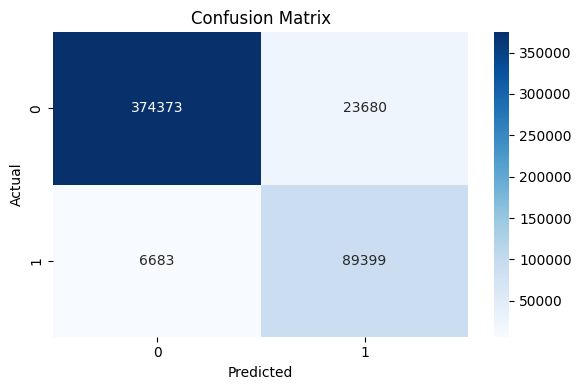

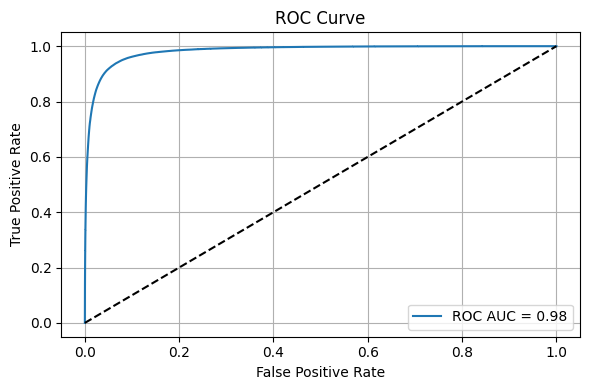

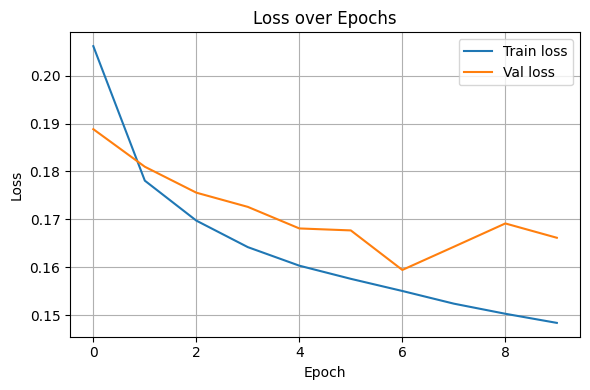

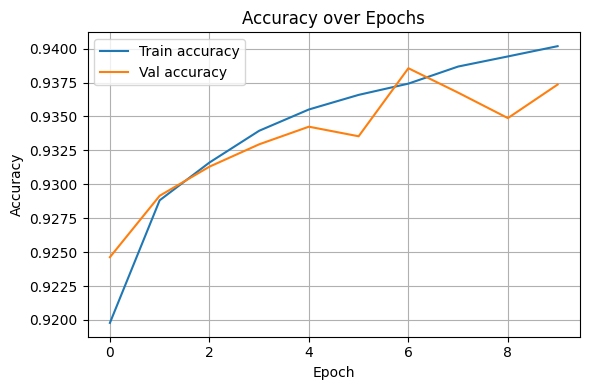

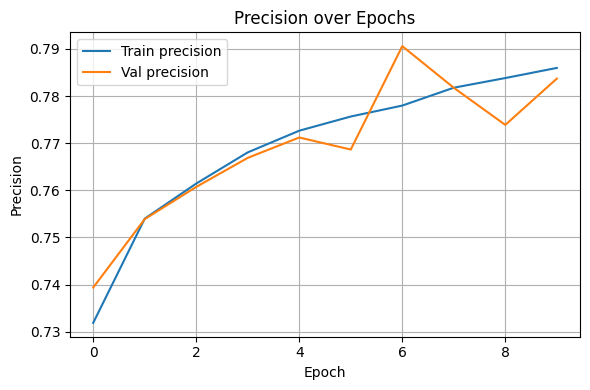

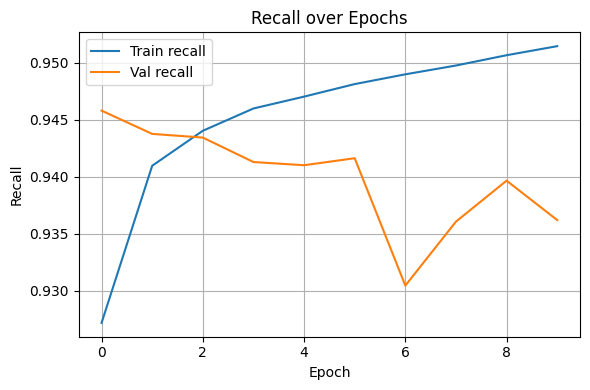

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ embedding_6 (Embedding)              │ (None, 100, 128)            │       2,560,000 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_7 (Dropout)                  │ (None, 100, 128)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ bidirectional_8 (Bidirectional)      │ (None, 100, 128)            │          98,816 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ bidirectional_9 (Bidirectional)      │ (None, 64)                  │          41,216 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_8 (Dropout)                  │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_8 (Dense)                      │ (None, 64)                  │           4,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_9 (Dropout)                  │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_9 (Dense)                      │ (None, 1)                   │              65 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 8,112,773 (30.95 MB)

 Trainable params: 2,704,257 (10.32 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 5,408,516 (20.63 MB)

In [23]:
# ===================== Imports ===================== Bidirectional LSTM mode
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn as sns

from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout, Bidirectional
from tensorflow.keras.callbacks import EarlyStopping, TensorBoard
from sklearn.model_selection import train_test_split
from sklearn.utils.class_weight import compute_class_weight
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc

# ===================== Data Preprocessing =====================
X = df['text'].astype(str)
y = df['label'].astype(int)

# Compute class weights for imbalance
class_weights = compute_class_weight('balanced', classes=np.unique(y), y=y)
class_weights = {i: w for i, w in enumerate(class_weights)}

# Tokenization
max_words = 20000
max_len = 100

tokenizer = Tokenizer(num_words=max_words, oov_token="<OOV>")
tokenizer.fit_on_texts(X)
X_seq = tokenizer.texts_to_sequences(X)
X_pad = pad_sequences(X_seq, maxlen=max_len, padding='post', truncating='post')

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_pad, y, test_size=0.2, stratify=y, random_state=42)

# TensorFlow datasets
batch_size = 128
train_ds = tf.data.Dataset.from_tensor_slices((X_train, y_train)).batch(batch_size).prefetch(tf.data.AUTOTUNE)
test_ds = tf.data.Dataset.from_tensor_slices((X_test, y_test)).batch(batch_size).prefetch(tf.data.AUTOTUNE)

# ===================== Model =====================
model = Sequential([
    Embedding(input_dim=max_words, output_dim=128, input_length=max_len),
    Dropout(0.4),
    Bidirectional(LSTM(64, return_sequences=True)),
    Bidirectional(LSTM(32)),
    Dropout(0.4),
    Dense(64, activation='relu'),
    Dropout(0.3),
    Dense(1, activation='sigmoid')
])

optimizer = tf.keras.optimizers.Adam(learning_rate=1e-4)

model.compile(
    loss='binary_crossentropy',
    optimizer=optimizer,
    metrics=['accuracy',
             tf.keras.metrics.Precision(name='precision'),
             tf.keras.metrics.Recall(name='recall')]
)


# ===================== Callbacks =====================
early_stop = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
tensorboard = TensorBoard(log_dir='./logs')

# ===================== Training =====================
history = model.fit(
    train_ds,
    validation_data=test_ds,
    epochs=10,
    class_weight=class_weights,
    callbacks=[early_stop, tensorboard]
)

# ===================== Evaluation =====================
y_pred_prob = model.predict(X_test)
y_pred = (y_pred_prob > 0.5).astype(int)

print(classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

# ===================== Visualization =====================
# Confusion matrix
plt.figure(figsize=(6, 4))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.tight_layout()
plt.show()

# ROC Curve
fpr, tpr, _ = roc_curve(y_test, y_pred_prob)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(6, 4))
plt.plot(fpr, tpr, label=f'ROC AUC = {roc_auc:.2f}')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# Metrics over epochs
metrics = ['loss', 'accuracy', 'precision', 'recall']
for metric in metrics:
    plt.figure(figsize=(6, 4))
    plt.plot(history.history[metric], label=f'Train {metric}')
    plt.plot(history.history[f'val_{metric}'], label=f'Val {metric}')
    plt.xlabel('Epoch')
    plt.ylabel(metric.capitalize())
    plt.title(f'{metric.capitalize()} over Epochs')
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()

model.summary()



Epoch 1/10


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


7721/7721 ━━━━━━━━━━━━━━━━━━━━ 157s 19ms/step - accuracy: 0.8948 - auc: 0.9445 - loss: 0.2852 - precision: 0.6809 - recall: 0.8746 - val_accuracy: 0.9311 - val_auc: 0.9776 - val_loss: 0.1750 - val_precision: 0.7685 - val_recall: 0.9238
Epoch 2/10
7721/7721 ━━━━━━━━━━━━━━━━━━━━ 145s 19ms/step - accuracy: 0.9263 - auc: 0.9779 - loss: 0.1849 - precision: 0.7467 - recall: 0.9383 - val_accuracy: 0.9332 - val_auc: 0.9794 - val_loss: 0.1720 - val_precision: 0.7737 - val_recall: 0.9277
Epoch 3/10
7721/7721 ━━━━━━━━━━━━━━━━━━━━ 145s 19ms/step - accuracy: 0.9297 - auc: 0.9802 - loss: 0.1751 - precision: 0.7558 - recall: 0.9411 - val_accuracy: 0.9325 - val_auc: 0.9801 - val_loss: 0.1737 - val_precision: 0.7692 - val_recall: 0.9325
Epoch 4/10
7721/7721 ━━━━━━━━━━━━━━━━━━━━ 144s 19ms/step - accuracy: 0.9314 - auc: 0.9815 - loss: 0.1692 - precision: 0.7602 - recall: 0.9436 - val_accuracy: 0.9332 - val_auc: 0.9806 - val_loss: 0.1702 - val_precision: 0.7710 - val_recall: 0.9336
Epoch 5/10
7721/7721 ━━

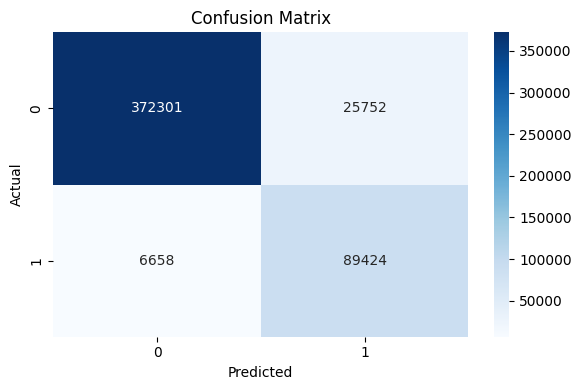

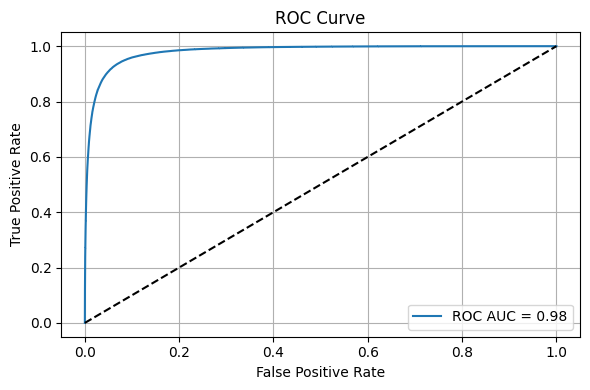

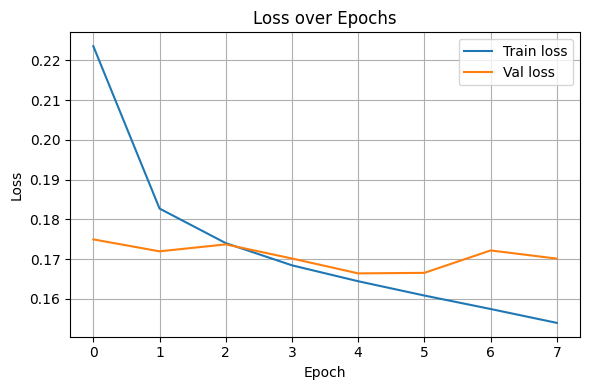

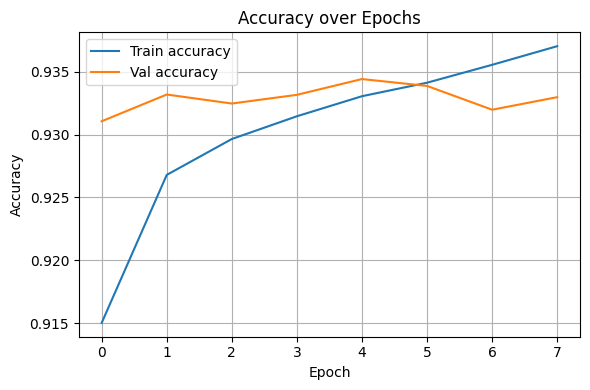

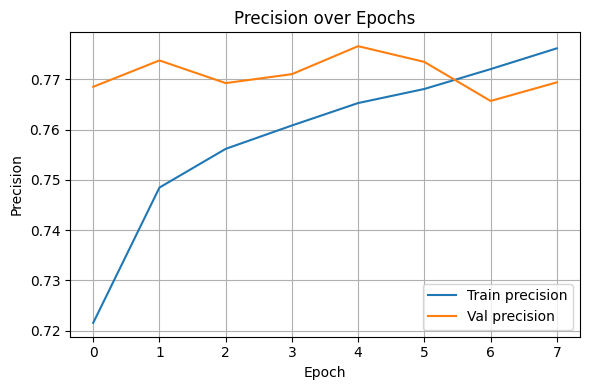

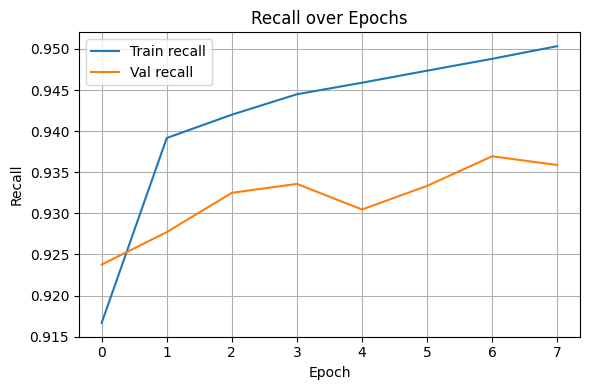

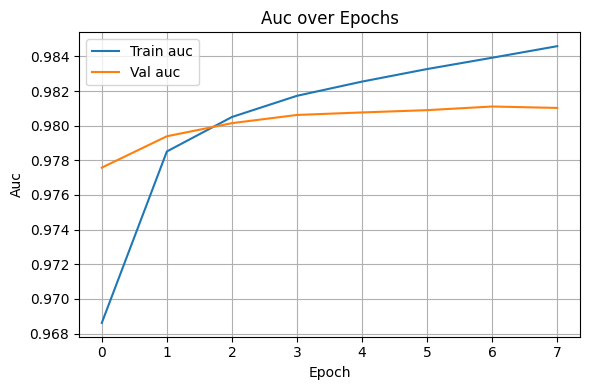

Model: "sequential_7"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ embedding_10 (Embedding)             │ (None, 100, 128)            │       1,920,000 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ bidirectional_14 (Bidirectional)     │ (None, 100, 64)             │          41,216 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ global_max_pooling1d_2               │ (None, 64)                  │               0 │
│ (GlobalMaxPooling1D)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_24 (Dense)                     │ (None, 64)                  │           4,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_16 (Dropout)                 │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_25 (Dense)                     │ (None, 1)                   │              65 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 5,896,325 (22.49 MB)

 Trainable params: 1,965,441 (7.50 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 3,930,884 (15.00 MB)

In [32]:
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn as sns

from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout, Bidirectional, GlobalMaxPooling1D
from tensorflow.keras.callbacks import EarlyStopping, TensorBoard, ModelCheckpoint
from sklearn.model_selection import train_test_split
from sklearn.utils.class_weight import compute_class_weight
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc

X = df['text'].astype(str)
y = df['label'].astype(int)

class_weights = compute_class_weight('balanced', classes=np.unique(y), y=y)
class_weights = {i: w for i, w in enumerate(class_weights)}

max_words = 15000
max_len = 100

tokenizer = Tokenizer(num_words=max_words, oov_token="<OOV>")
tokenizer.fit_on_texts(X)
X_seq = tokenizer.texts_to_sequences(X)
X_pad = pad_sequences(X_seq, maxlen=max_len, padding='post', truncating='post')

X_train, X_test, y_train, y_test = train_test_split(X_pad, y, test_size=0.2, stratify=y, random_state=42)

batch_size = 256
train_ds = tf.data.Dataset.from_tensor_slices((X_train, y_train)).shuffle(2048).batch(batch_size).prefetch(tf.data.AUTOTUNE)
test_ds = tf.data.Dataset.from_tensor_slices((X_test, y_test)).batch(batch_size).prefetch(tf.data.AUTOTUNE)

model = Sequential([
    Embedding(input_dim=max_words, output_dim=128, input_length=max_len),
    Bidirectional(LSTM(32, return_sequences=True, dropout=0.2)),
    GlobalMaxPooling1D(),
    Dense(64, activation='relu'),
    Dropout(0.3),
    Dense(1, activation='sigmoid')
])

model.compile(
    loss='binary_crossentropy',
    optimizer=tf.keras.optimizers.Adam(learning_rate=1e-4),
    metrics=[
        tf.keras.metrics.BinaryAccuracy(name='accuracy'),
        tf.keras.metrics.Precision(name='precision'),
        tf.keras.metrics.Recall(name='recall'),
        tf.keras.metrics.AUC(name='auc')
    ]
)

early_stop = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)
checkpoint = ModelCheckpoint('best_model.keras', monitor='val_loss', save_best_only=True)
tensorboard = TensorBoard(log_dir='./logs')

history = model.fit(
    train_ds,
    validation_data=test_ds,
    epochs=10,
    class_weight=class_weights,
    callbacks=[early_stop, checkpoint, tensorboard],
    verbose=1
)

y_pred_prob = model.predict(X_test)
y_pred = (y_pred_prob > 0.5).astype(int)

print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

plt.figure(figsize=(6, 4))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.tight_layout()
plt.show()

fpr, tpr, _ = roc_curve(y_test, y_pred_prob)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(6, 4))
plt.plot(fpr, tpr, label=f'ROC AUC = {roc_auc:.2f}')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

metrics = ['loss', 'accuracy', 'precision', 'recall', 'auc']
for metric in metrics:
    plt.figure(figsize=(6, 4))
    plt.plot(history.history[metric], label=f'Train {metric}')
    plt.plot(history.history[f'val_{metric}'], label=f'Val {metric}')
    plt.xlabel('Epoch')
    plt.ylabel(metric.capitalize())
    plt.title(f'{metric.capitalize()} over Epochs')
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()

model.summary()


In [ ]:
# ===================== Imports ===================== Bidirectional LSTM + GlobalMaxPooling   
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn as sns

from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout, Bidirectional, GlobalMaxPooling1D
from tensorflow.keras.callbacks import EarlyStopping, TensorBoard, ModelCheckpoint
from sklearn.model_selection import train_test_split
from sklearn.utils.class_weight import compute_class_weight
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc

# ===================== Load and Preprocess Data =====================
# df = pd.read_csv('your_data.csv')  # Uncomment and modify if needed

X = df['text'].astype(str)
y = df['label'].astype(int)

# Class weight handling
class_weights = compute_class_weight(class_weight='balanced', classes=np.unique(y), y=y)
class_weights = {i: w for i, w in enumerate(class_weights)}

# Tokenization
max_words = 15000
max_len = 100

tokenizer = Tokenizer(num_words=max_words, oov_token="<OOV>")
tokenizer.fit_on_texts(X)
X_seq = tokenizer.texts_to_sequences(X)
X_pad = pad_sequences(X_seq, maxlen=max_len, padding='post', truncating='post')

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_pad, y, test_size=0.2, stratify=y, random_state=42)

# Dataset pipeline
batch_size = 256
train_ds = tf.data.Dataset.from_tensor_slices((X_train, y_train)).shuffle(2048).batch(batch_size).prefetch(tf.data.AUTOTUNE)
test_ds = tf.data.Dataset.from_tensor_slices((X_test, y_test)).batch(batch_size).prefetch(tf.data.AUTOTUNE)

# ===================== Model =====================
model = Sequential([
    Embedding(input_dim=max_words, output_dim=128, input_length=max_len),
    Bidirectional(LSTM(32, return_sequences=True, dropout=0.2)),
    GlobalMaxPooling1D(),
    Dense(64, activation='relu'),
    Dropout(0.3),
    Dense(1, activation='sigmoid')
])

model.compile(
    loss='binary_crossentropy',
    optimizer=tf.keras.optimizers.Adam(learning_rate=1e-4),
    metrics=[
        tf.keras.metrics.BinaryAccuracy(name='accuracy'),
        tf.keras.metrics.Precision(name='precision'),
        tf.keras.metrics.Recall(name='recall'),
        tf.keras.metrics.AUC(name='auc')
    ]
)

# ===================== Callbacks =====================
early_stop = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)
checkpoint = ModelCheckpoint('best_model.keras', monitor='val_loss', save_best_only=True)
tensorboard = TensorBoard(log_dir='./logs')

# ===================== Training =====================
history = model.fit(
    train_ds,
    validation_data=test_ds,
    epochs=10,
    class_weight=class_weights,
    callbacks=[early_stop, checkpoint, tensorboard],
    verbose=1
)

# ===================== Evaluation =====================
y_pred_prob = model.predict(X_test)
y_pred = (y_pred_prob > 0.5).astype(int)

print(classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

# ===================== Visualization =====================
# Confusion matrix
plt.figure(figsize=(6, 4))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.tight_layout()
plt.show()

# ROC Curve
fpr, tpr, _ = roc_curve(y_test, y_pred_prob)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(6, 4))
plt.plot(fpr, tpr, label=f'ROC AUC = {roc_auc:.2f}')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# Training metrics
metrics = ['loss', 'accuracy', 'precision', 'recall', 'auc']
for metric in metrics:
    plt.figure(figsize=(6, 4))
    plt.plot(history.history[metric], label=f'Train {metric}')
    plt.plot(history.history[f'val_{metric}'], label=f'Val {metric}')
    plt.xlabel('Epoch')
    plt.ylabel(metric.capitalize())
    plt.title(f'{metric.capitalize()} over Epochs')
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()

# ===================== Summary =====================
model.summary()


In [ ]:
# ===================== Imports =====================  CNN + BiLSTM hybrid model. 
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn as sns

from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, Conv1D, MaxPooling1D, LSTM, Dense, Dropout, Bidirectional
from tensorflow.keras.callbacks import EarlyStopping, TensorBoard, ModelCheckpoint
from sklearn.model_selection import train_test_split
from sklearn.utils.class_weight import compute_class_weight
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc

# ===================== Data Preprocessing =====================
X = df['text'].astype(str)
y = df['label'].astype(int)

# Compute class weights for imbalance
class_weights = compute_class_weight('balanced', classes=np.unique(y), y=y)
class_weights = {i: w for i, w in enumerate(class_weights)}

# Tokenization
max_words = 15000
max_len = 100

tokenizer = Tokenizer(num_words=max_words, oov_token="<OOV>")
tokenizer.fit_on_texts(X)
X_seq = tokenizer.texts_to_sequences(X)
X_pad = pad_sequences(X_seq, maxlen=max_len, padding='post', truncating='post')

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_pad, y, test_size=0.2, stratify=y, random_state=42)

# Dataset pipeline
batch_size = 256
train_ds = tf.data.Dataset.from_tensor_slices((X_train, y_train)).shuffle(2048).batch(batch_size).prefetch(tf.data.AUTOTUNE)
test_ds = tf.data.Dataset.from_tensor_slices((X_test, y_test)).batch(batch_size).prefetch(tf.data.AUTOTUNE)

# ===================== CNN + BiLSTM Model =====================
model = Sequential([
    Embedding(input_dim=max_words, output_dim=128, input_length=max_len),
    
    # CNN layer for feature extraction
    Conv1D(64, 5, activation='relu'),
    MaxPooling1D(4),
    
    # Bidirectional LSTM layer
    Bidirectional(LSTM(32, return_sequences=True, dropout=0.2)),
    Bidirectional(LSTM(32, dropout=0.2)),
    
    # Fully connected layer
    Dense(64, activation='relu'),
    Dropout(0.3),
    
    # Output layer
    Dense(1, activation='sigmoid')
])

model.compile(
    loss='binary_crossentropy',
    optimizer=tf.keras.optimizers.Adam(learning_rate=1e-4),
    metrics=[
        tf.keras.metrics.BinaryAccuracy(name='accuracy'),
        tf.keras.metrics.Precision(name='precision'),
        tf.keras.metrics.Recall(name='recall'),
        tf.keras.metrics.AUC(name='auc')
    ]
)

# ===================== Callbacks =====================
early_stop = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)
checkpoint = ModelCheckpoint('best_model_cnn_bilstm.keras', monitor='val_loss', save_best_only=True)
tensorboard = TensorBoard(log_dir='./logs')

# ===================== Training =====================
history = model.fit(
    train_ds,
    validation_data=test_ds,
    epochs=10,
    class_weight=class_weights,
    callbacks=[early_stop, checkpoint, tensorboard],
    verbose=1
)

# ===================== Evaluation =====================
y_pred_prob = model.predict(X_test)
y_pred = (y_pred_prob > 0.5).astype(int)

print(classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

# ===================== Visualization =====================
# Confusion matrix
plt.figure(figsize=(6, 4))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.tight_layout()
plt.show()

# ROC Curve
fpr, tpr, _ = roc_curve(y_test, y_pred_prob)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(6, 4))
plt.plot(fpr, tpr, label=f'ROC AUC = {roc_auc:.2f}')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# Training metrics
metrics = ['loss', 'accuracy', 'precision', 'recall', 'auc']
for metric in metrics:
    plt.figure(figsize=(6, 4))
    plt.plot(history.history[metric], label=f'Train {metric}')
    plt.plot(history.history[f'val_{metric}'], label=f'Val {metric}')
    plt.xlabel('Epoch')
    plt.ylabel(metric.capitalize())
    plt.title(f'{metric.capitalize()} over Epochs')
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()

# ===================== Summary =====================
model.summary()
